# Prerequisites

In [1]:
pip install osmnx geodatasets pyfonts wordcloud pillow PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 14.7 MB/s eta 0:00:00


In [12]:
# Essential libraries
import geopandas as gpd
from geodatasets import get_path
import matplotlib.pyplot as plt
import numpy as np

# Image processing
from PIL import Image, ImageOps, ImageDraw, ImageFont

# Word cloud generation
from wordcloud import WordCloud

# HTTP requests
import requests

# PDF handling
import fitz  # PyMuPDF

# Load Spatial Data

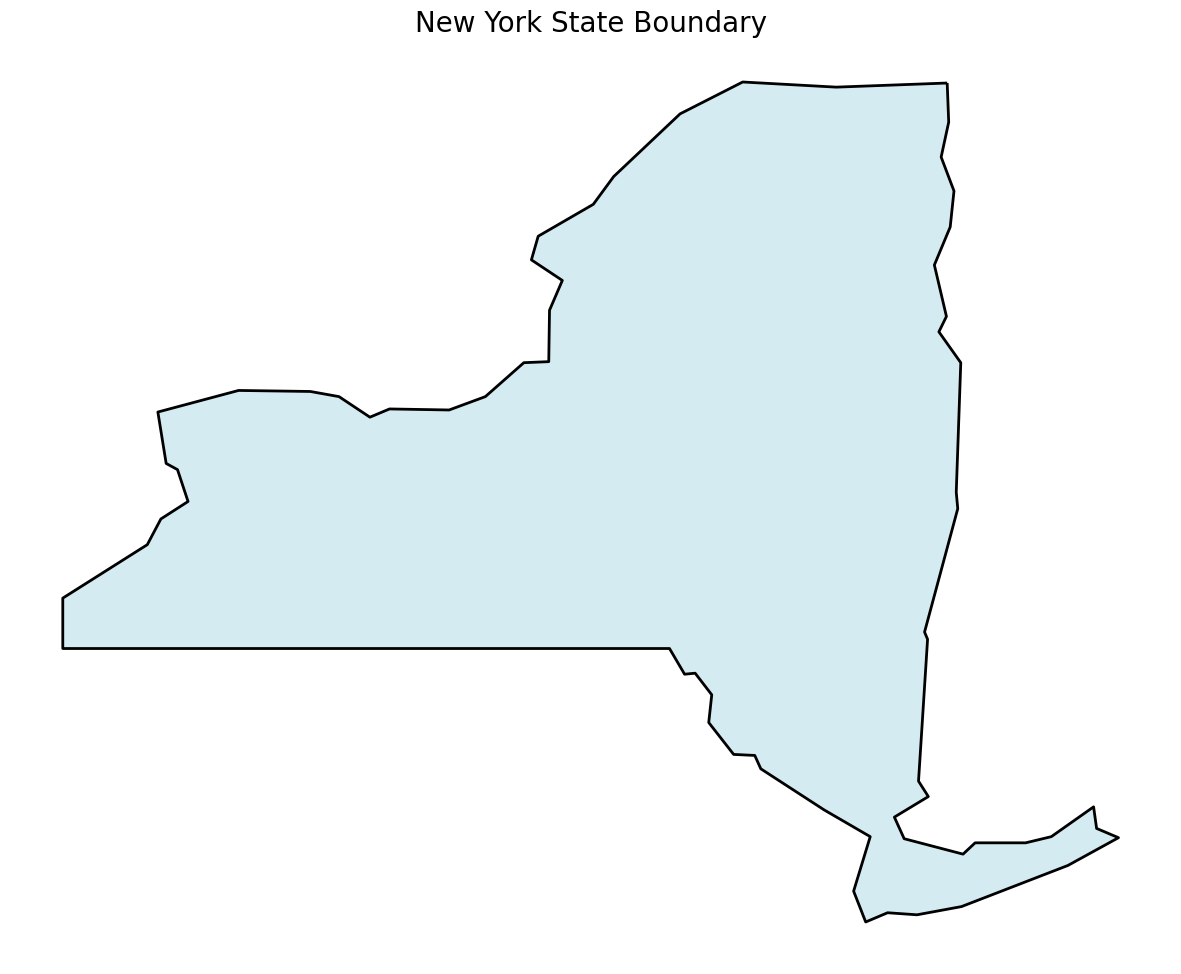

In [3]:
# Load state boundaries from a TIGER/Line shapefile (replace with actual path if available)
states = gpd.read_file("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")

# Filter for New York State
new_york_state = states[states["name"] == "New York"]

# Plot New York State boundary
fig, ax = plt.subplots(figsize=(20, 12))
new_york_state.boundary.plot(ax=ax, color="black", linewidth=2)
new_york_state.plot(ax=ax, color="lightblue", alpha=0.5)
ax.set_title("New York State Boundary", fontsize=20)
ax.axis("off")

# Save the plot to a file
plt.savefig("ny_state_boundary.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

# Load Text from NYC Climate Action Council Document (Retrieve from Online)

In [4]:
# Load Climate Action Council File

# URL of the PDF file
pdf_url = "https://climate.ny.gov/-/media/Project/Climate/Files/NYS-Climate-Action-Council-Final-Scoping-Plan-2022.pdf"

# Local path to save the PDF
local_pdf_path = "CRDG-4-1-May-2022.pdf"

# Download the file
response = requests.get(pdf_url)
if response.status_code == 200:
    with open(local_pdf_path, "wb") as file:
        file.write(response.content)
    print("PDF downloaded successfully.")
else:
    print("Failed to download the PDF.")
    exit()


PDF downloaded successfully.


In [6]:
# Open the PDF file
pdf_document = fitz.open(local_pdf_path)

# Initialize a variable to hold the entire text
full_text = ""

# Extract text from each page and append to the variable
for page_number in range(len(pdf_document)):
    page = pdf_document[page_number]
    full_text += page.get_text() + "\n"

# Close the PDF file
pdf_document.close()

# Print the first 500 characters of the text (optional)
print(full_text[:500])

SCOPING 
PLAN
Full Report
December 2022

ii 
Preferred Citation 
New York State Climate Action Council. 2022. “New York State Climate Action Council Scoping Plan.” 
climate.ny.gov/ScopingPlan 
Keywords 
New York State; Climate Leadership and Community Protection Act; Climate Act; Climate Action 
Council; Council; Scoping Plan; Department of Environmental Conservation; DEC; New York State 
Energy Research and Development Authority; NYSERDA; climate change; greenhouse gas emissions; 
emissions red


# Clean Text

In [7]:
# Use function to clean text from prepare_text.py (credit to https://github.com/m3redithw/data-science-visualizations/blob/main/WordClouds/prepare.py)
text = prepare_text.clean(full_text)
text

'scoping plan full report december 2022 ii preferred citation new york state climate action council 2022 new york state climate action council scoping plan climatenygovscopingplan keywords new york state climate leadership community protection act climate act climate action council council scoping plan department environmental conservation dec new york state energy research development authority nyserda climate change greenhouse gas emission emission reduction renewable electricity clean energy zeroemission net zero emission sector strategy mitigation adaptation resiliency integration analysis climate justice transition capand invest clean transportation standard heat pump decarbonization electrification energy efficiency disadvantaged community iii acknowledgment cochairs doreen harris president ceo new york state energy research development authority basil seggos commissioner new york state department environmental conservation would like thank member climate action council hard work

# Wordcloud Masking

In [9]:
from PIL import Image, ImageDraw

nyc_mask = np.array(Image.open('ny_state_boundary.png'))
nyc_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [10]:
# Font URLs
custom_font_url = "https://github.com/google/fonts/raw/main/ofl/cabinsketch/CabinSketch-Regular.ttf"
custom_font_path = "CabinSketch-Regular.ttf"

# Download the Lato font
with open(custom_font_path, "wb") as file:
    file.write(requests.get(custom_font_url).content)

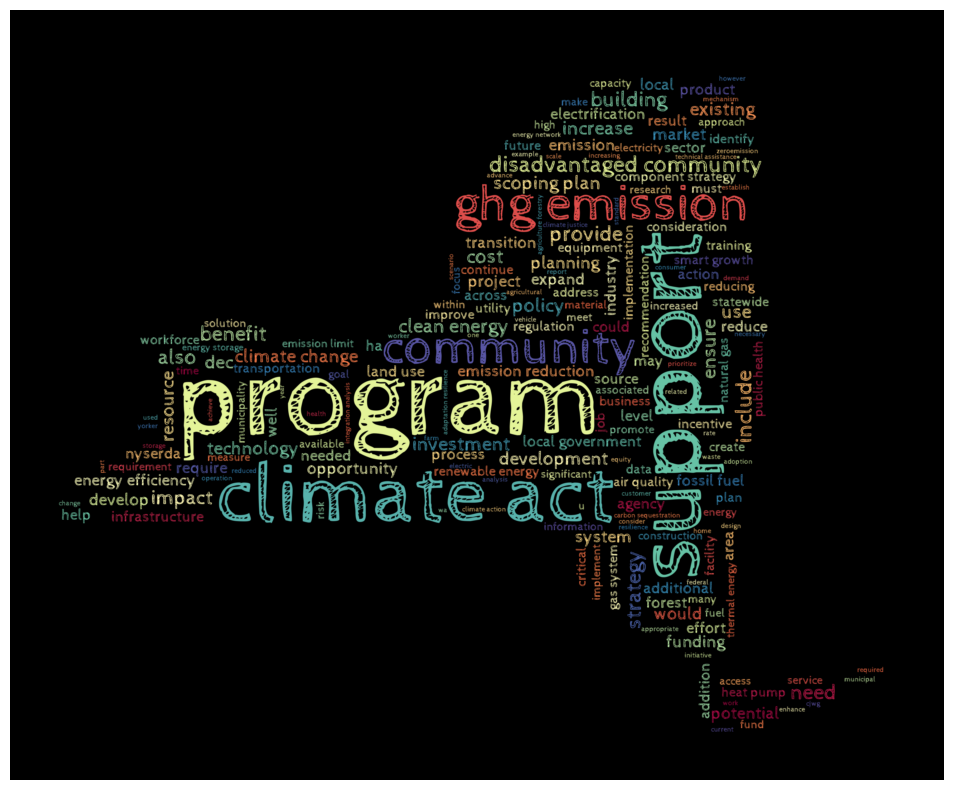

In [13]:
# Stopwords list
stopwords_list = ['new', 'york', 'state', 'including']

# Generate word cloud with Lato font
wc = WordCloud(
    background_color="#000000",
    mask=nyc_mask,
    # contour_width=1,
    # contour_color="#FFFFFF",
    colormap="Spectral",
    stopwords=stopwords_list,
    prefer_horizontal=0.9,      # prefer horizontal words
    font_path=custom_font_path
).generate(text)

# Plot the word cloud
plt.figure(figsize=(20, 10))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.gca().set_title("")

# Save the plot without any padding
filename = "wordcloud_no_border.png"
plt.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

# Show the plot
plt.show()


# Layouting

In [14]:
# Download fonts
title_font_url = "https://github.com/google/fonts/raw/main/ofl/merriweather/Merriweather-Regular.ttf"
footer_font_url = "https://github.com/google/fonts/raw/main/ofl/lato/Lato-Regular.ttf"
title_font_path = "Merriweather-Regular.ttf"
footer_font_path = "Lato-Regular.ttf"

# Download Title Font
with open(title_font_path, "wb") as file:
    file.write(requests.get(title_font_url).content)

# Download Footer Font
with open(footer_font_path, "wb") as file:
    file.write(requests.get(footer_font_url).content)

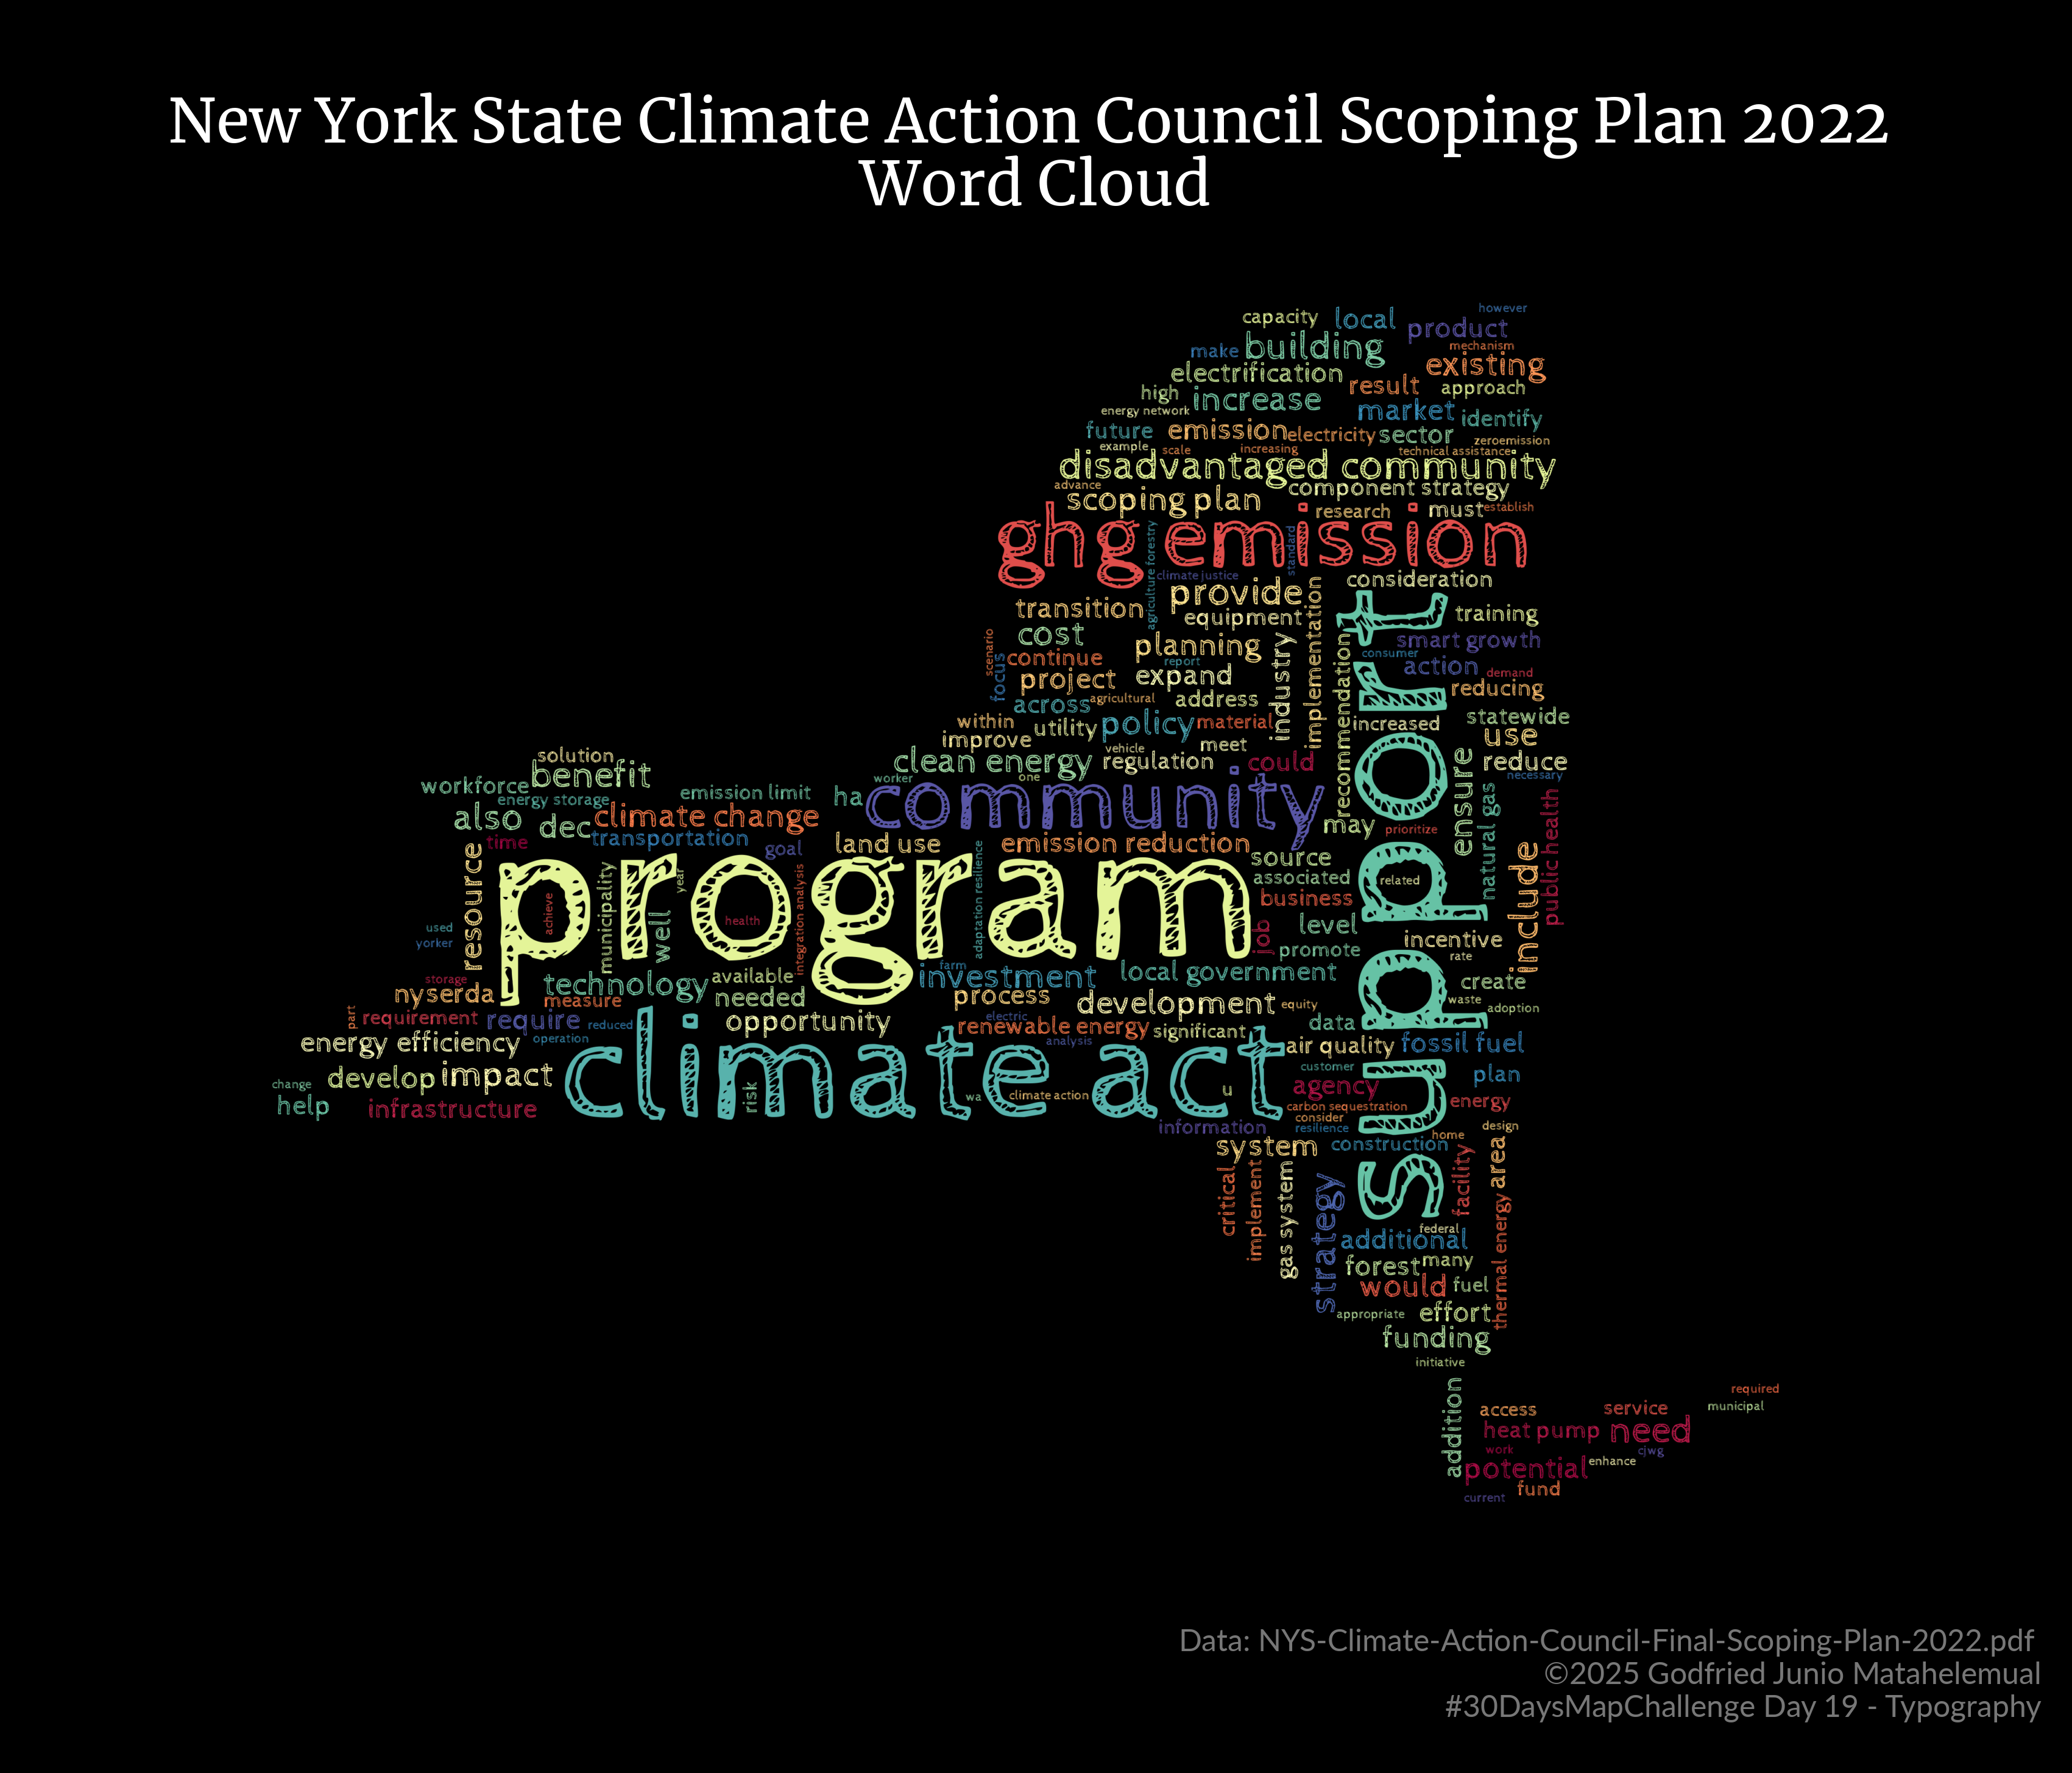

In [16]:
# Load the word cloud image
map_image = Image.open(filename)

# Add padding to the image
padding = (300, 300, 300, 300)  # (left, top, right, bottom)
padded_image = ImageOps.expand(map_image, border=padding, fill="black")

# Create a drawing context
draw = ImageDraw.Draw(padded_image)

# Load fonts
title_font = ImageFont.truetype(title_font_path, size=100)
footer_font = ImageFont.truetype(footer_font_path, size=50)

# Add title
title_text = "New York State Climate Action Council Scoping Plan 2022 \nWord Cloud"
title_position = (padded_image.width // 2, 250)  # Centered in the top padding
draw.multiline_text(
    title_position,
    title_text,
    font=title_font,
    fill="white",
    anchor="mm",
    align="center",
)

# Add footer
footer_text = "Data: NYS-Climate-Action-Council-Final-Scoping-Plan-2022.pdf \n©2025 Godfried Junio Matahelemual\n#30DaysMapChallenge Day 19 - Typography"
footer_position = (padded_image.width - 50, padded_image.height - 250)
draw.multiline_text(
    footer_position,
    footer_text,
    font=footer_font,
    fill="#777777",  # Gray color
    anchor="ra",  # Right-aligned
    align="right",
)

# Save the final annotated image
output_filename = "day19_wordcloud_nyClimateActionPlan.png"
padded_image.save(output_filename)

# Display the result
padded_image

# Reference:
- https://github.com/m3redithw/data-science-visualizations/blob/main/WordClouds/prepare.py
- https://medium.com/@m3redithw/wordclouds-with-python-c287887acc8b